# Part 1: Adversarial Training

## 1. Imports

In [48]:
import json
from matplotlib import pyplot as plt

# import display and markdown from IPython.display
from IPython.display import display, Markdown

## 2. Load Data

In [49]:
with open('../logs/adversarial-runs.json', "r") as f:
	data = json.load(f)
	print(f"{data = }")


data = {'0': {'benign_accuracy': 36.1, 'adv_accuracy': 22.78, 'benign_loss': 177.9286128282547, 'adv_loss': 203.87648224830627}, '1': {'benign_accuracy': 43.62, 'adv_accuracy': 25.56, 'benign_loss': 161.68619239330292, 'adv_loss': 198.92305946350098}, '2': {'benign_accuracy': 48.02, 'adv_accuracy': 26.35, 'benign_loss': 148.73672199249268, 'adv_loss': 192.5128663778305}, '3': {'benign_accuracy': 53.31, 'adv_accuracy': 28.41, 'benign_loss': 141.49699580669403, 'adv_loss': 186.69099080562592}, '4': {'benign_accuracy': 58.91, 'adv_accuracy': 28.57, 'benign_loss': 120.46422338485718, 'adv_loss': 185.4357441663742}, '5': {'benign_accuracy': 62.32, 'adv_accuracy': 31.99, 'benign_loss': 119.03731489181519, 'adv_loss': 179.5154685974121}, '6': {'benign_accuracy': 66.42, 'adv_accuracy': 32.32, 'benign_loss': 107.40600901842117, 'adv_loss': 177.17971765995026}, '7': {'benign_accuracy': 68.31, 'adv_accuracy': 32.67, 'benign_loss': 100.01594144105911, 'adv_loss': 180.5010244846344}, '8': {'benign_

## 3. Initialize Plot

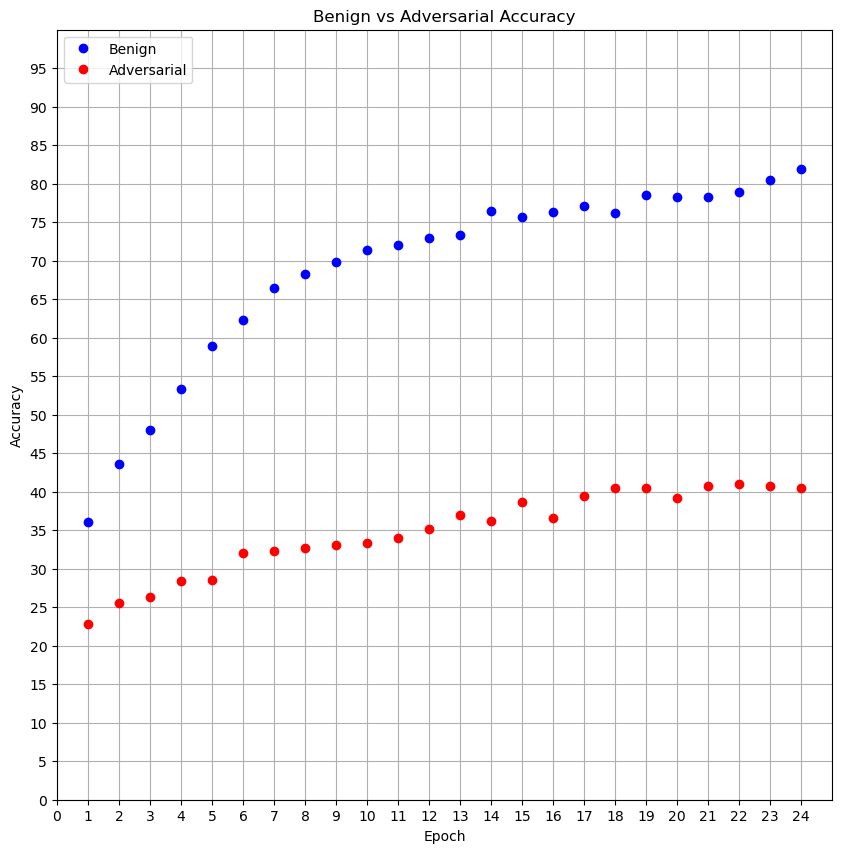

In [50]:
plot = plt.figure(figsize=(10, 10))

epochs = range(1, 25)
benign_accuracies = [data[str(epoch-1)]["benign_accuracy"] for epoch in epochs]
adversarial_accuracies = [data[str(epoch-1)]["adv_accuracy"] for epoch in epochs]

plt.plot(epochs, benign_accuracies, 'bo')
plt.plot(epochs, adversarial_accuracies, 'ro')

## show grid
plt.grid(True)

# scale axis
plt.axis([0, 25, 0, 100])
plt.xticks(range(0, 25, 1))
plt.yticks(range(0, 100, 5))

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Benign vs Adversarial Accuracy')
plt.legend(['Benign', 'Adversarial'], loc='upper left')
plt.show()

---

# Part 2: Data Augmentation

In [51]:
# load data
with open('../logs/augmentation-runs.json', "r") as f:
  data = json.load(f)
  print(f"{data = }")

data = {'Tech0': [[10, '0.4140909016132355'], [30, '0.5585493593583953'], [50, '0.68454545736']], 'Tech1': [[10, '0.0450840258439005'], [30, '0.45590909123420715'], [50, '0.7595454421997']], 'Tech2': [[10, '0.16699999910593033'], [30, '0.23999999701976776'], [50, '0.5295454454421997']], 'Tech3': [[10, '0.09045454859733582'], [30, '0.1359090954065323'], [50, '0.635793529357323']]}


In [52]:
# display table with markdown
display(Markdown(f"""
  | Mode | 10 Epochs | 30 Epochs | 50 Epochs |
  |------|------------|-----------|-----------|
  | Tech0 | {data["Tech0"][0][1]} | {data["Tech0"][1][1]} | {data["Tech0"][2][1]} |
  | Tech1 | {data["Tech1"][0][1]} | {data["Tech1"][1][1]} | {data["Tech1"][2][1]} |
  | Tech2 | {data["Tech2"][0][1]} | {data["Tech2"][1][1]} | {data["Tech2"][2][1]} |
  | Tech3 | {data["Tech3"][0][1]} | {data["Tech3"][1][1]} | {data["Tech3"][2][1]} |
"""))


  | Mode | 10 Epochs | 30 Epochs | 50 Epochs |
  |------|------------|-----------|-----------|
  | Tech0 | 0.4140909016132355 | 0.5585493593583953 | 0.68454545736 |
  | Tech1 | 0.0450840258439005 | 0.45590909123420715 | 0.7595454421997 |
  | Tech2 | 0.16699999910593033 | 0.23999999701976776 | 0.5295454454421997 |
  | Tech3 | 0.09045454859733582 | 0.1359090954065323 | 0.635793529357323 |


In [53]:
# format above table as latex table

latex_table = f"""
\\begin{{table}}[htbp]
\\begin{{tabular}}{{|l|l|l|l|}}
\\hline
Mode & 10 Epochs & 30 Epochs & 50 Epochs \\\\
\\hline
Tech0 & ${data["Tech0"][0][1]}$ & ${data["Tech0"][1][1]}$ & ${data["Tech0"][2][1]}$ \\\\
Tech1 & ${data["Tech1"][0][1]}$ & ${data["Tech1"][1][1]}$ & ${data["Tech1"][2][1]}$ \\\\
Tech2 & ${data["Tech2"][0][1]}$ & ${data["Tech2"][1][1]}$ & ${data["Tech2"][2][1]}$ \\\\
Tech3 & ${data["Tech3"][0][1]}$ & ${data["Tech3"][1][1]}$ & ${data["Tech3"][2][1]}$ \\\\
\\hline
\\end{{tabular}}
\\end{{table}}
"""

latex_table = latex_table.replace("\n", "")
latex_table

'\\begin{table}[htbp]\\begin{tabular}{|l|l|l|l|}\\hlineMode & 10 Epochs & 30 Epochs & 50 Epochs \\\\\\hlineTech0 & $0.4140909016132355$ & $0.5585493593583953$ & $0.68454545736$ \\\\Tech1 & $0.0450840258439005$ & $0.45590909123420715$ & $0.7595454421997$ \\\\Tech2 & $0.16699999910593033$ & $0.23999999701976776$ & $0.5295454454421997$ \\\\Tech3 & $0.09045454859733582$ & $0.1359090954065323$ & $0.635793529357323$ \\\\\\hline\\end{tabular}\\end{table}'